In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

In [5]:
df3 = pd.read_csv('bank-additional-full.csv',sep=';')

## **survey and understand the data**

In [6]:
df3.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39816,47,admin.,divorced,high.school,no,yes,no,telephone,jun,mon,...,1,999,0,nonexistent,-1.7,94.055,-39.8,0.711,4991.6,yes
10423,28,services,married,unknown,no,no,no,telephone,jun,mon,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
24623,36,services,married,high.school,no,yes,no,cellular,nov,mon,...,2,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
324,54,technician,married,professional.course,no,yes,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3133,40,services,married,high.school,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
23541,32,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,15,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
34662,30,admin.,single,high.school,no,yes,no,cellular,may,thu,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
34371,32,blue-collar,married,professional.course,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
39514,46,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,2,6,2,success,-1.8,93.749,-34.6,0.645,5008.7,no
1820,41,technician,married,university.degree,no,yes,no,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


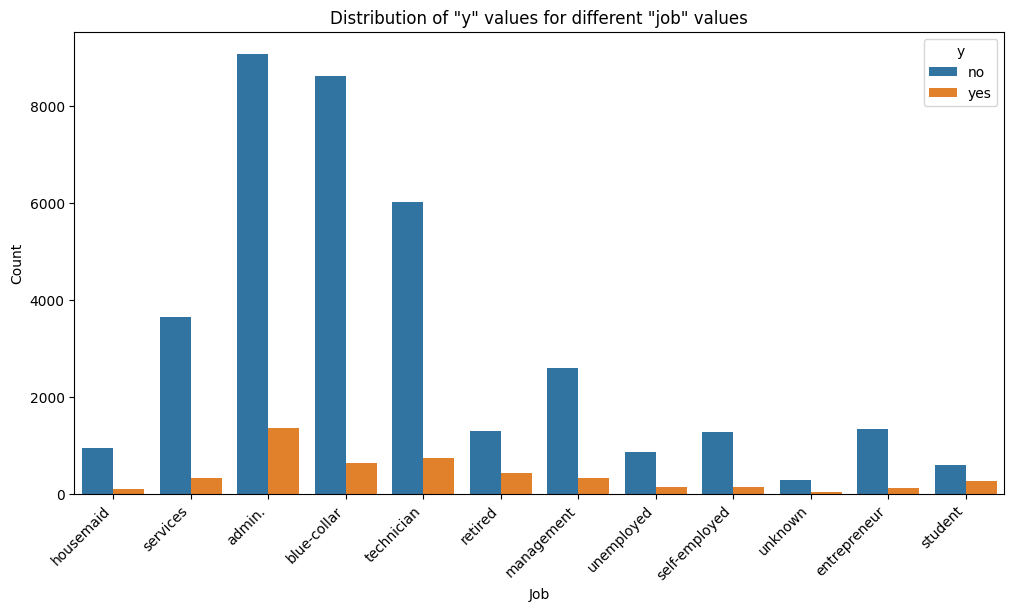

In [8]:
# prompt: plot distribution of values of "y" as a function of different values of "job"

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df3)
plt.title('Distribution of "y" values for different "job" values')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

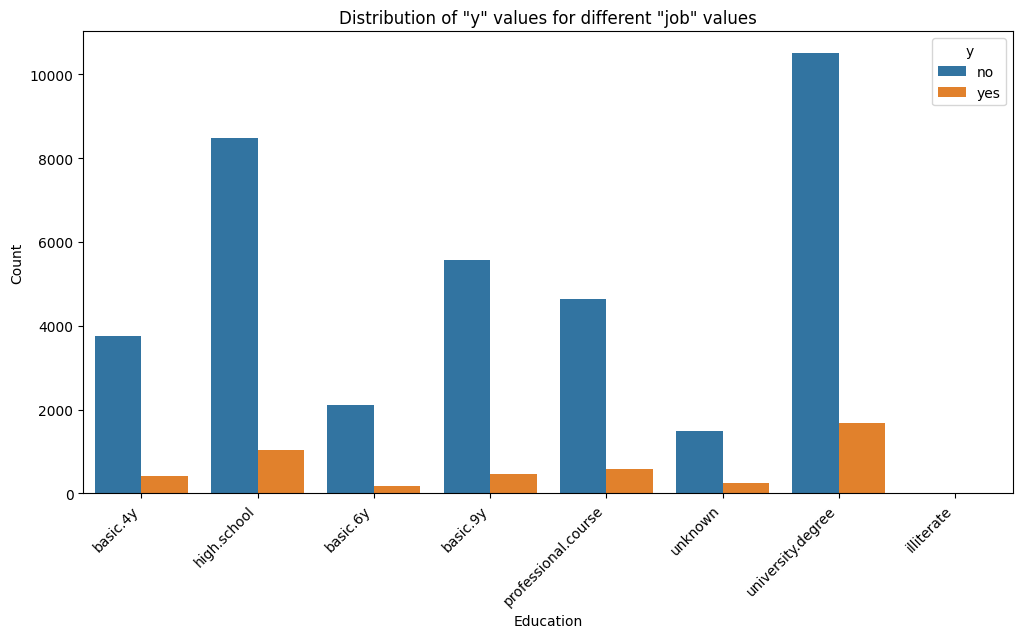

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=df3)
plt.title('Distribution of "y" values for different "job" values')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

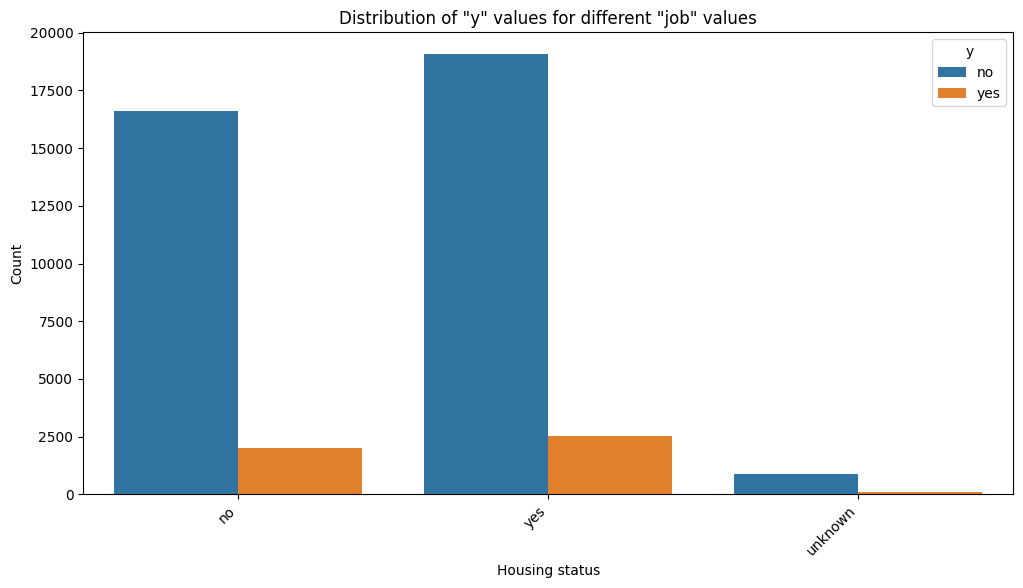

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='housing', hue='y', data=df3)
plt.title('Distribution of "y" values for different "job" values')
plt.xlabel('Housing status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

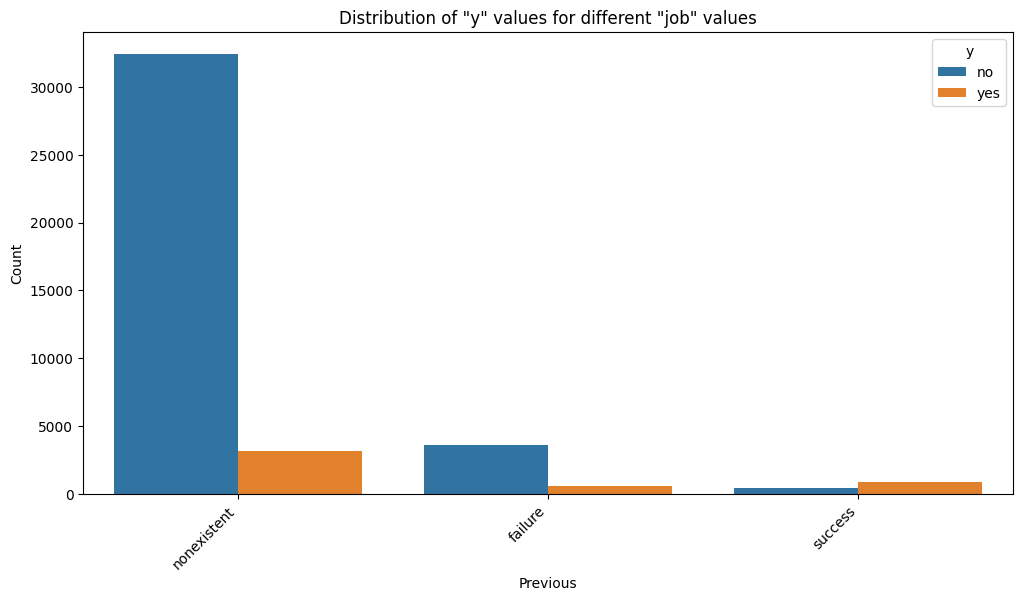

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='poutcome', hue='y', data=df3)
plt.title('Distribution of "y" values for different "job" values')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

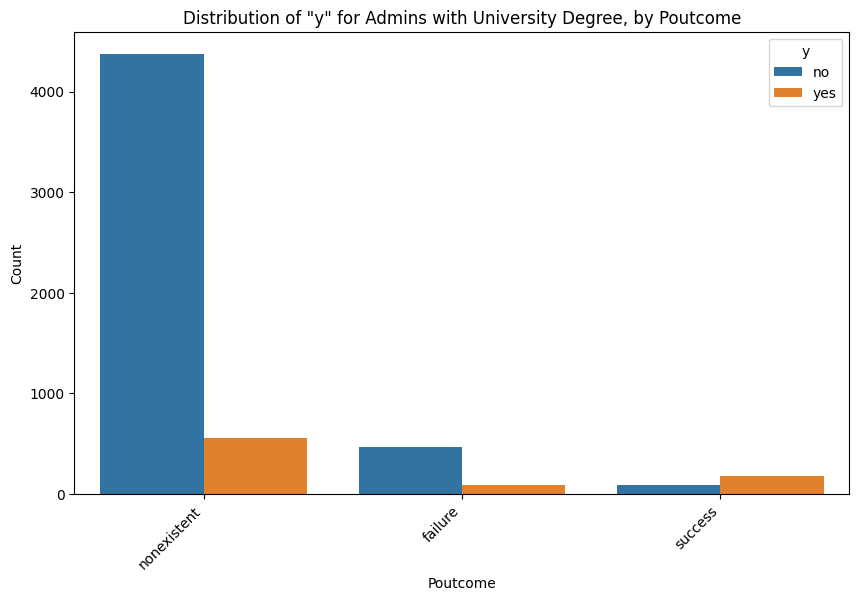

In [13]:
# prompt: plot distribution of values of "y" as a function of different values of "poutcome" for entries that are "admin" type with university degree

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is already loaded as in your previous code

# Filter for "admin" job type and university degree
admin_university = df3[(df3['job'] == 'admin.') & (df3['education'] == 'university.degree')]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=admin_university)
plt.title('Distribution of "y" for Admins with University Degree, by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

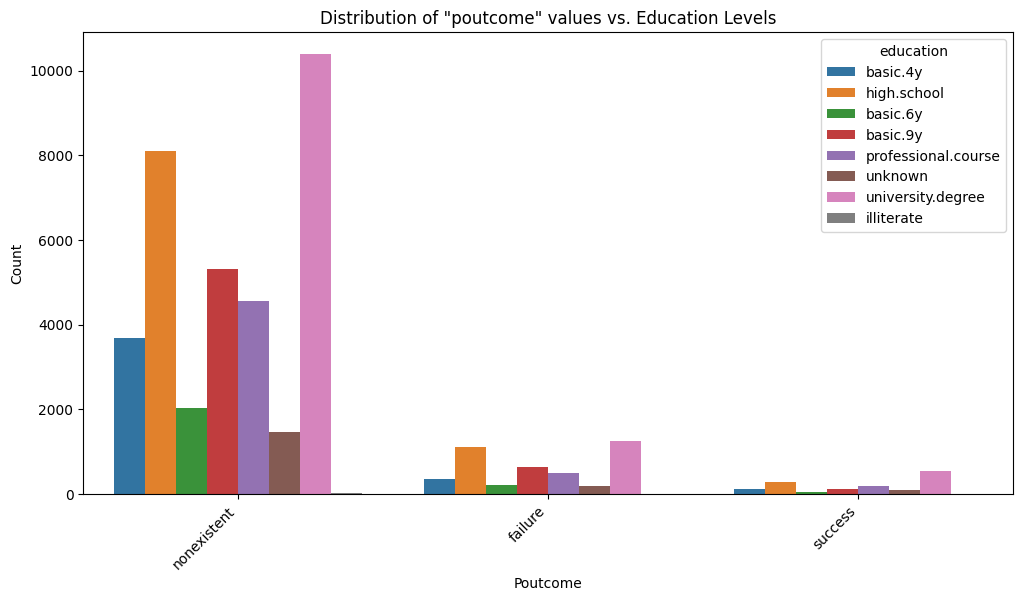

In [14]:
# prompt: plot distribution of "poutcome" values vs. the education levels

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='poutcome', hue='education', data=df3)
plt.title('Distribution of "poutcome" values vs. Education Levels')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

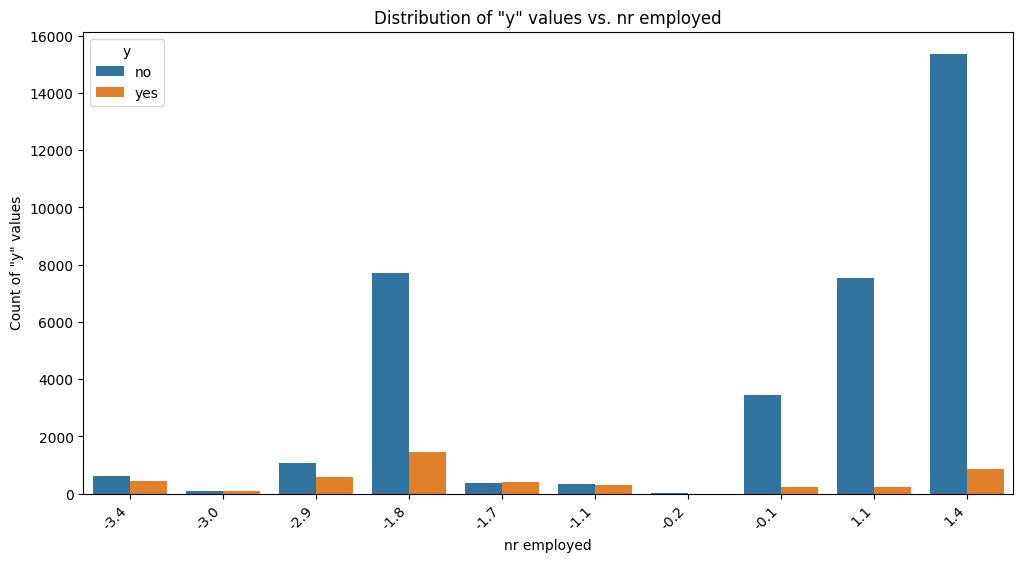

In [19]:
# prompt: plot the count of "y" values vs the emp.var.rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='emp.var.rate', hue='y', data=df3)
plt.title('Distribution of "y" values vs. nr employed')
plt.xlabel('nr employed')
plt.ylabel('Count of "y" values')
plt.xticks(rotation=45, ha='right')
plt.show()

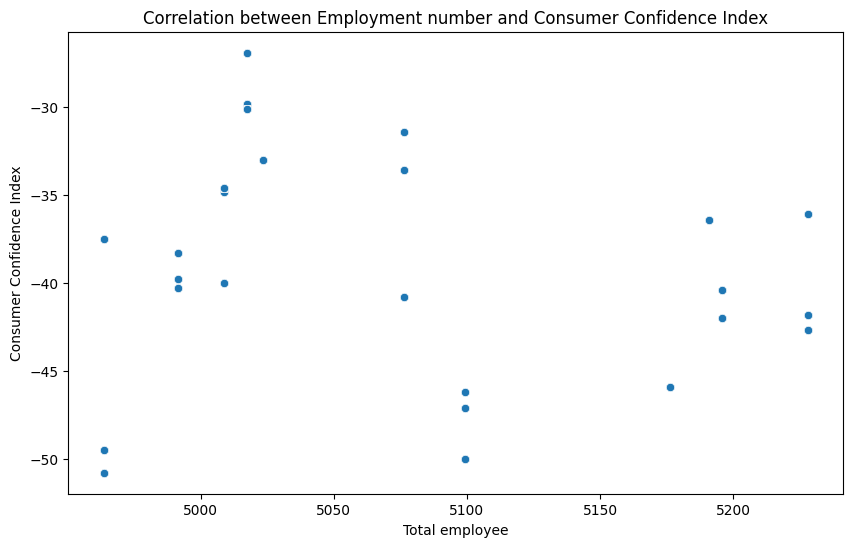

Correlation coefficient: 0.19604126813196246


In [54]:
# prompt: plot correlation of total number of employed people and the consumer confidence index

# Assuming 'emp.var.rate' represents the total number of employed people
# and you have a column named 'cons.conf.idx' for the consumer confidence index

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nr.employed', y='cons.conf.idx', data=df3)
plt.title('Correlation between Employment number and Consumer Confidence Index')
plt.xlabel('Total employee')
plt.ylabel('Consumer Confidence Index')
plt.show()

correlation = df3['emp.var.rate'].corr(df3['cons.conf.idx'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.19604126813196246


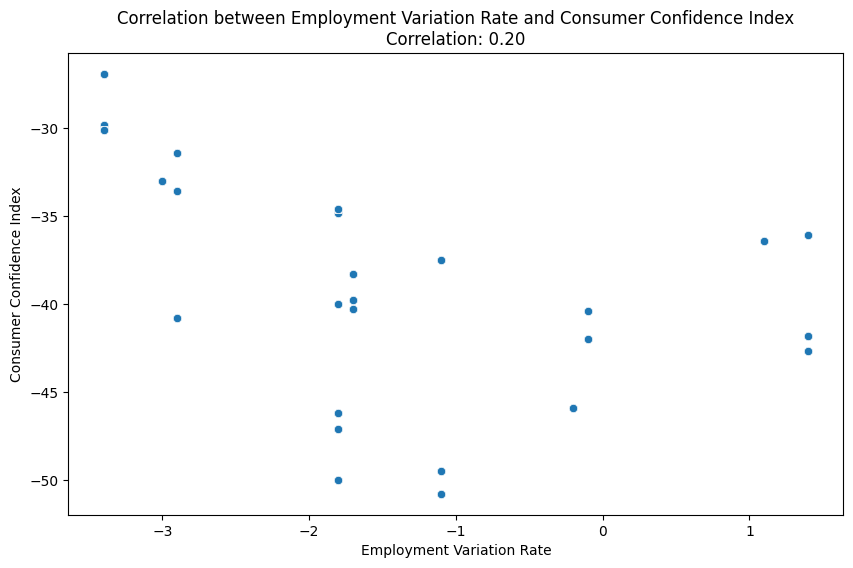

In [52]:
# prompt: plot correlation of total number of nr.employed and the consumer confidence index

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df3 is already loaded as in your previous code
# ... (your existing code to load and preprocess df3) ...

# Calculate the correlation
correlation = df3['emp.var.rate'].corr(df3['cons.conf.idx'])
print(f"Correlation coefficient: {correlation}")

# Create the scatter plot with correlation displayed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='emp.var.rate', y='cons.conf.idx', data=df3)
plt.title(f'Correlation between Employment Variation Rate and Consumer Confidence Index\nCorrelation: {correlation:.2f}')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Consumer Confidence Index')
plt.show()

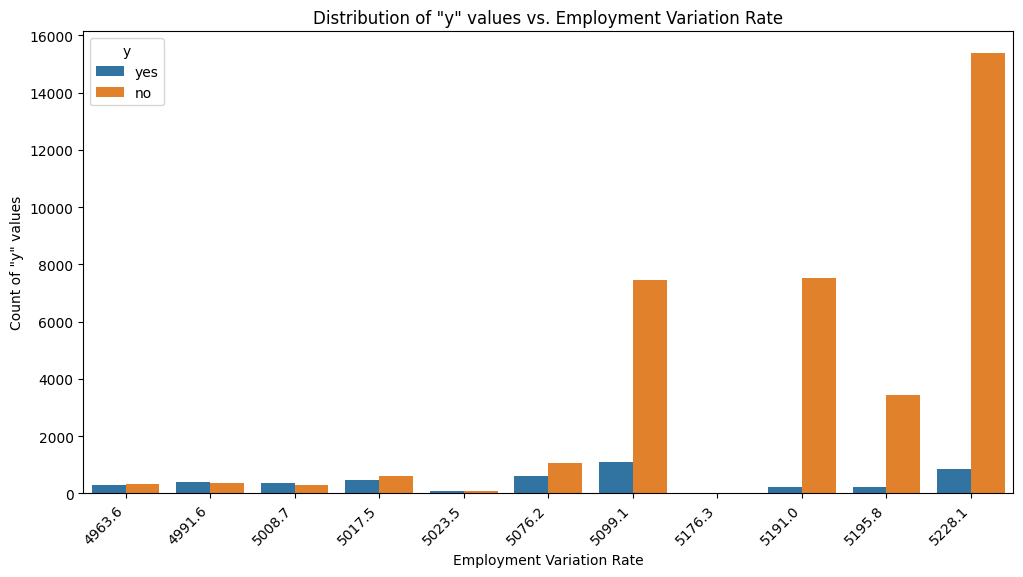

In [20]:
# prompt: plot the count of "y" values vs the emp.var.rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='nr.employed', hue='y', data=df3)
plt.title('Distribution of "y" values vs. Employment Variation Rate')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Count of "y" values')
plt.xticks(rotation=45, ha='right')
plt.show()

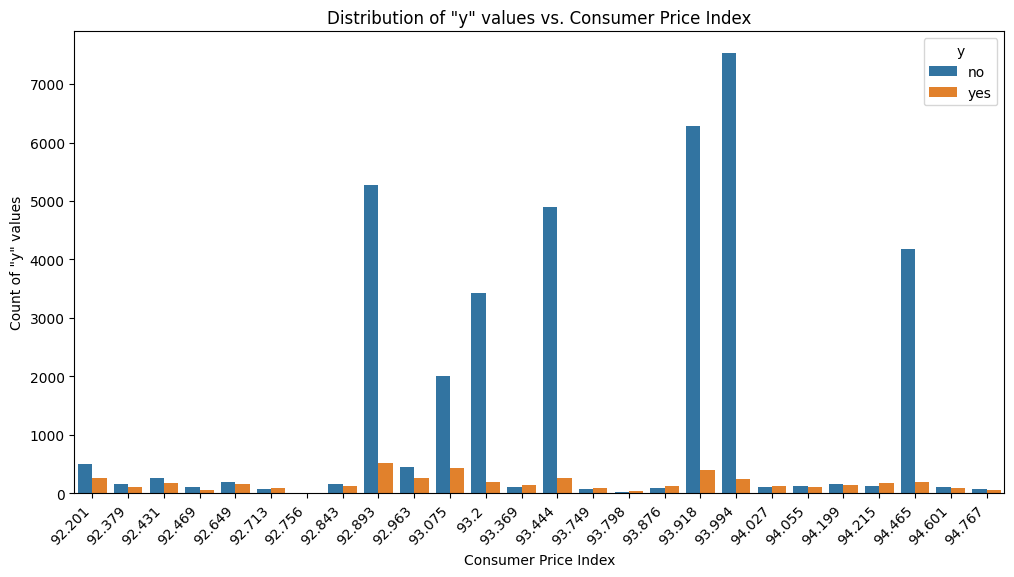

In [21]:
# prompt: plot the count of "y" values vs the cons.price.index

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ... (rest of your imports)

# Assuming df3 is already loaded as in your previous code
plt.figure(figsize=(12, 6))
sns.countplot(x='cons.price.idx', hue='y', data=df3)
plt.title('Distribution of "y" values vs. Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Count of "y" values')
plt.xticks(rotation=45, ha='right')
plt.show()

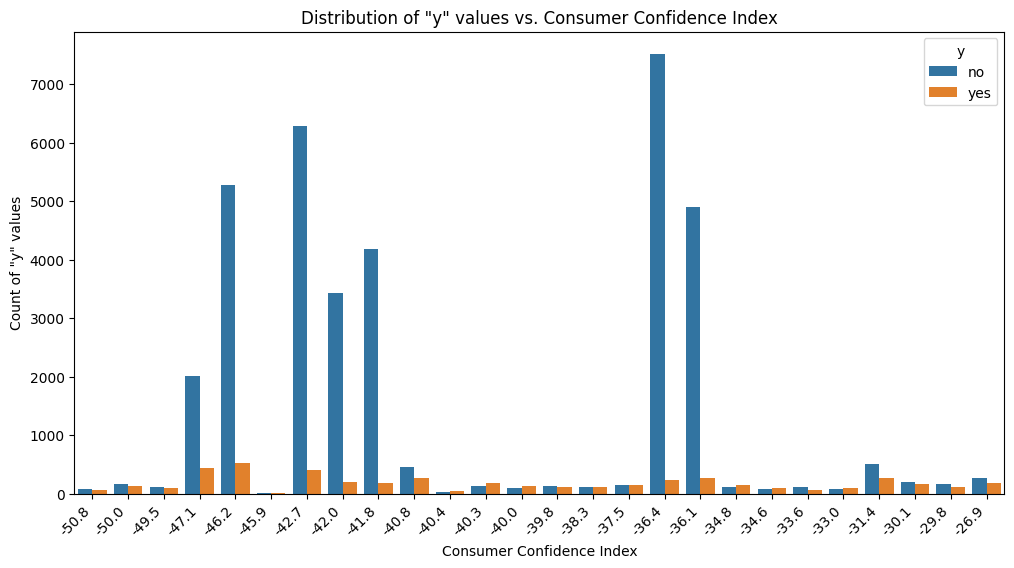

In [22]:
# prompt: plot the count of "y" values vs the cons.conf.index

# Assuming df3 is already loaded as in your previous code
plt.figure(figsize=(12, 6))
sns.countplot(x='cons.conf.idx', hue='y', data=df3)
plt.title('Distribution of "y" values vs. Consumer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Count of "y" values')
plt.xticks(rotation=45, ha='right')
plt.show()

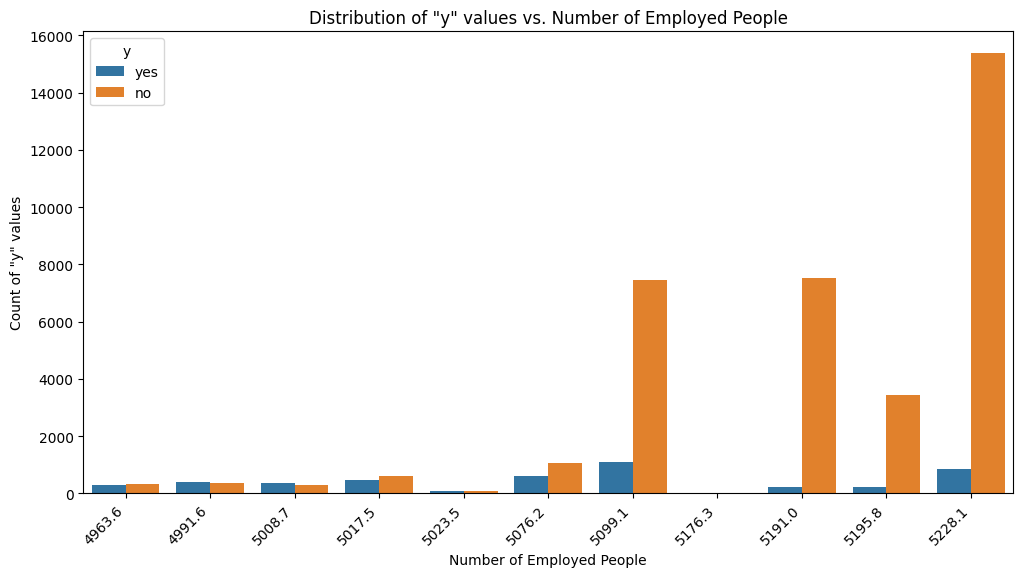

In [23]:
# prompt: plot the count of "y" values vs the number of employed people

plt.figure(figsize=(12, 6))
sns.countplot(x='nr.employed', hue='y', data=df3)
plt.title('Distribution of "y" values vs. Number of Employed People')
plt.xlabel('Number of Employed People')
plt.ylabel('Count of "y" values')
plt.xticks(rotation=45, ha='right')
plt.show()

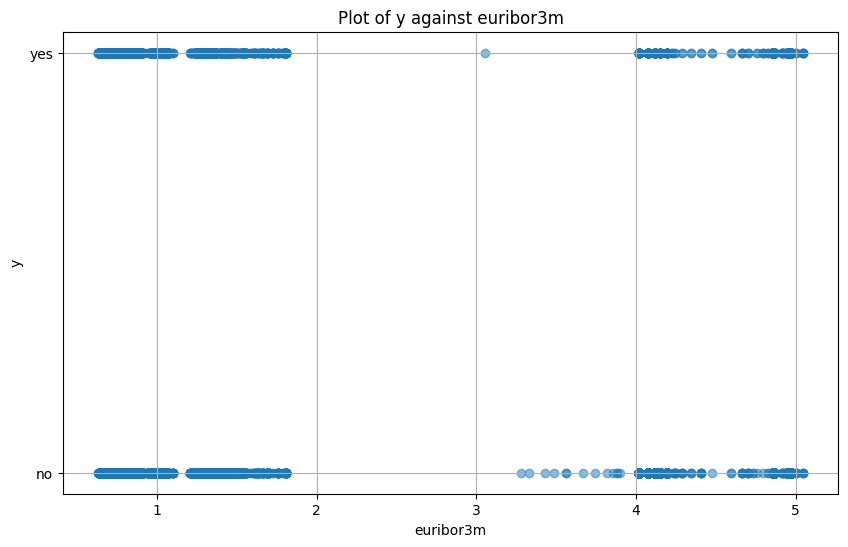

In [24]:
# prompt: plot y against euribor3m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


if df3 is not None and 'euribor3m' in df3.columns:
    # Assuming 'y' is the target variable and you want to plot it against 'euribor3m'
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(df3['euribor3m'], df3['y'], alpha=0.5)
        plt.xlabel('euribor3m')
        plt.ylabel('y')
        plt.title('Plot of y against euribor3m')
        plt.grid(True)
        plt.show()
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame.")
else:
    print("DataFrame is empty or 'euribor3m' column is not present.")

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
# prompt: build a KNN classifier for df3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df3 is already loaded as in the previous code

# 1. Data Preprocessing
# Select relevant features and target variable
X = df3.drop('y', axis=1)  # Features (all columns except 'y')
y = df3['y']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize with k=5 (you can adjust this)
knn.fit(X_train, y_train)

# 3. Make Predictions
y_pred = knn.predict(X_test)

# 4. Evaluate the Model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7303
         yes       0.58      0.34      0.43       935

    accuracy                           0.90      8238
   macro avg       0.75      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238

[[7069  234]
 [ 613  322]]


In [27]:
# prompt: build a decision tree model for df3

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

[[6814  489]
 [ 448  487]]


In [28]:
'''
# prompt: display the decision tree structure

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()
'''

"\n# prompt: display the decision tree structure\n\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import plot_tree\n\nplt.figure(figsize=(20,10))\nplot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)\nplt.show()\n"

              precision    recall  f1-score   support

          no       0.95      0.95      0.95      7303
         yes       0.60      0.59      0.60       935

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238

[[6935  368]
 [ 382  553]]


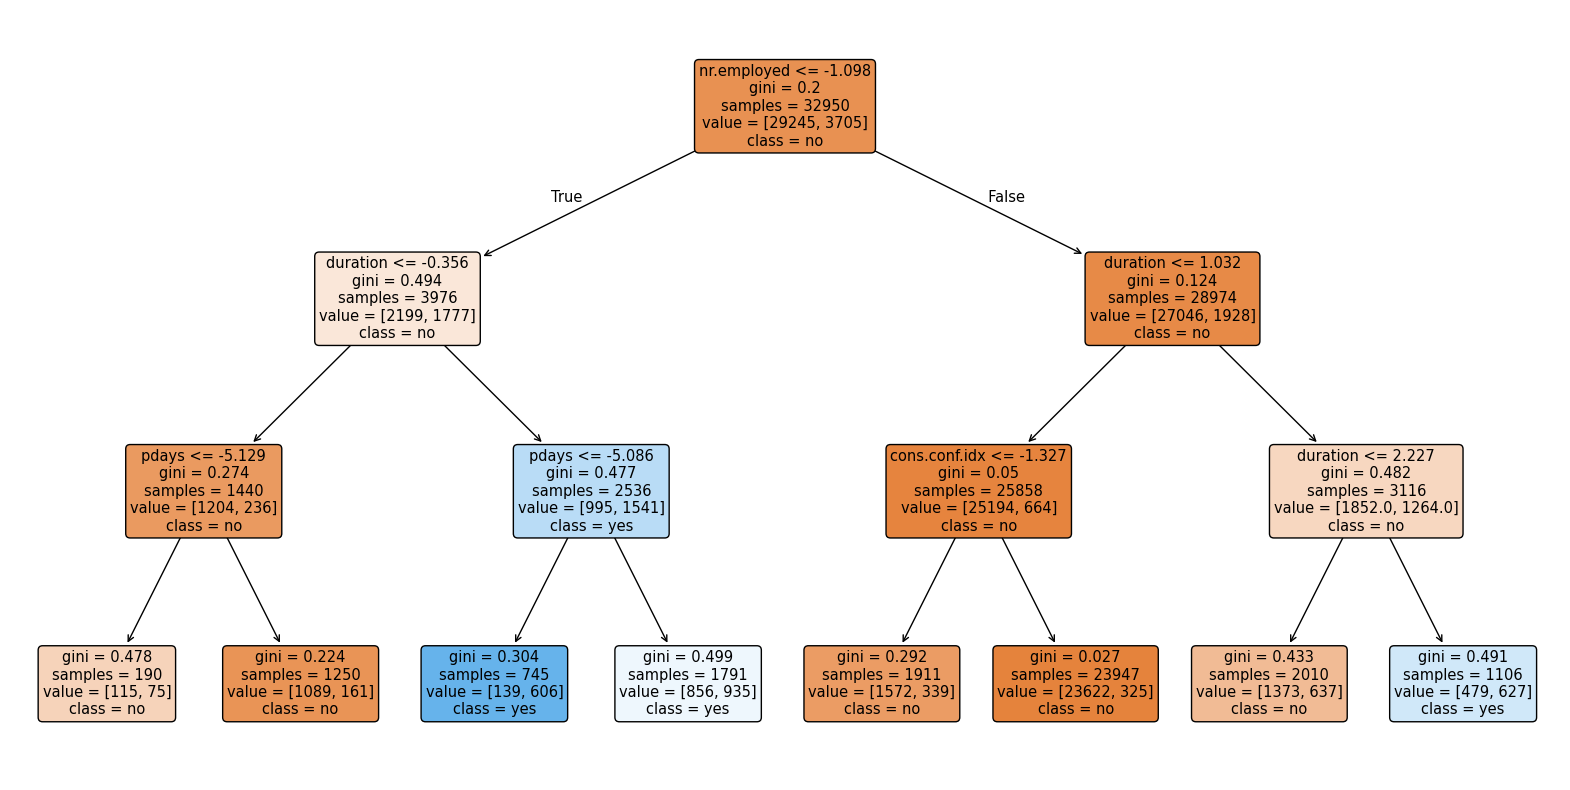

In [29]:
# prompt: build a decision tree model for df3 dataset with fewer than four layers
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Initialize the Decision Tree Classifier with max_depth
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42) # Limit to 3 layers

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

In [30]:
# prompt: build a support vector model to classify df3

from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm_classifier = SVC(random_state=42)  # You can adjust hyperparameters here

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7303
         yes       0.67      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

[[7122  181]
 [ 574  361]]


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

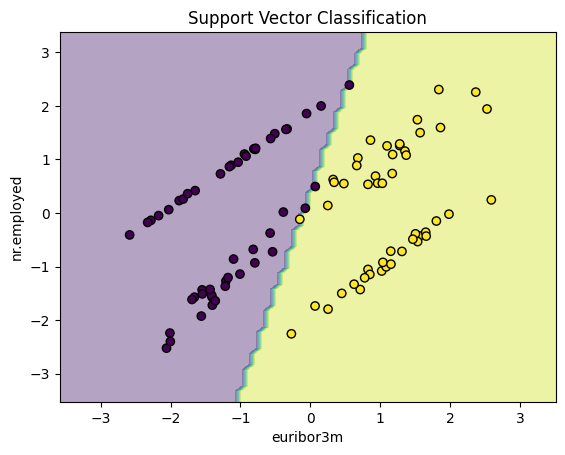

In [31]:
# prompt: plot the classification diagram of support vector classification

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data (replace with your actual data)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train an SVM classifier (linear kernel for visualization)
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel("euribor3m")
plt.ylabel("nr.employed")
plt.title("Support Vector Classification")
plt.show()

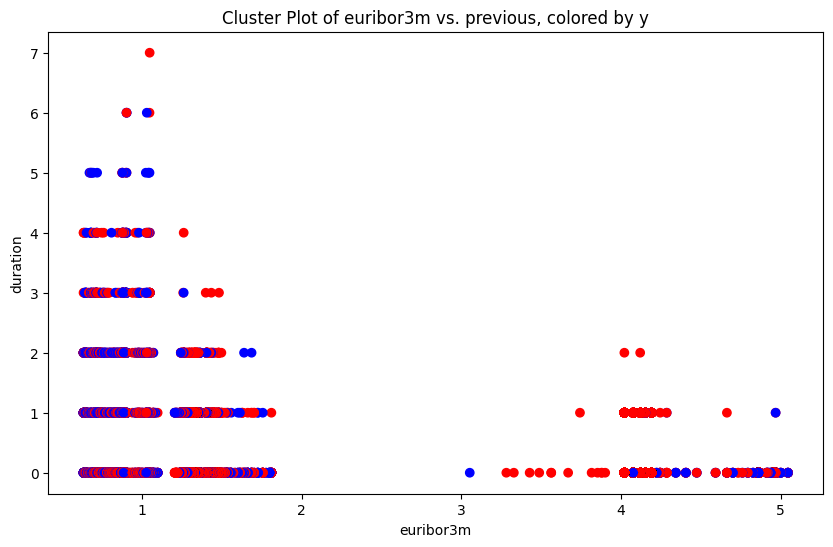

In [32]:
# prompt: generate cluster plot for df3 showing euribor3m and previous, with color difference for 'y'

import matplotlib.pyplot as plt

# Assuming df3 and its relevant columns exist

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df3['euribor3m'], df3['previous'], c=df3['y'].map({'yes': 'blue', 'no': 'red'}))
plt.xlabel('euribor3m')
plt.ylabel('duration')
plt.title('Cluster Plot of euribor3m vs. previous, colored by y')
plt.show()

In [33]:
# prompt: create a logistic regression model for df3

# Assuming df3 and its relevant columns exist

# 1. Data Preprocessing
# Select relevant features and target variable
X = df3.drop('y', axis=1)  # Features (all columns except 'y')
y = df3['y']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # Initialize the model, increase max_iter if needed
logreg.fit(X_train, y_train)

# 3. Make Predictions
y_pred_logreg = logreg.predict(X_test)

# 4. Evaluate the Model
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

[[7103  200]
 [ 529  406]]


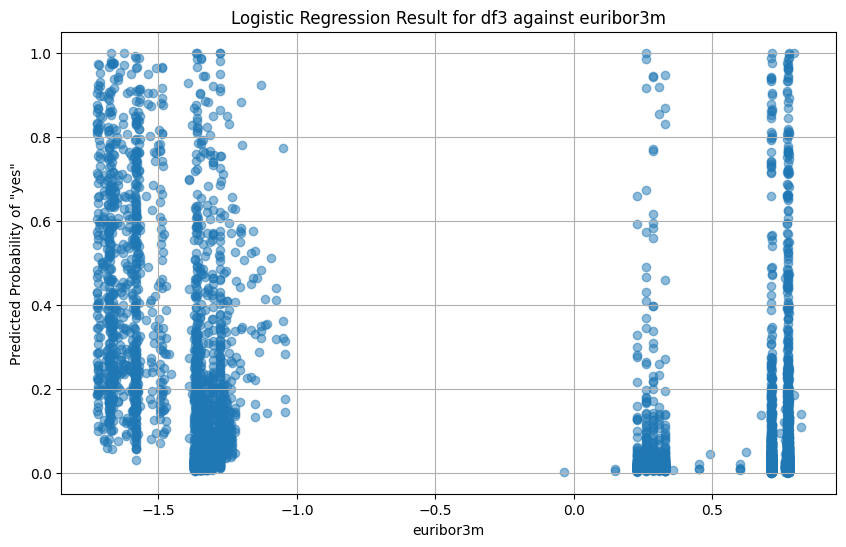

In [34]:
# prompt: plot the logistic regression result for df3 against euribor3m

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df3 and its relevant columns exist from the previous code

# 1. Data Preprocessing (same as before)
X = df3.drop('y', axis=1)
y = df3['y']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Logistic Regression (same as before)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 3.  Get predicted probabilities for the positive class ('yes')
y_prob = logreg.predict_proba(X_test)[:, 1]

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, list(X.columns).index('euribor3m')], y_prob, alpha=0.5)  # Assuming 'euribor3m' is a numerical feature
plt.xlabel('euribor3m')
plt.ylabel('Predicted Probability of "yes"')
plt.title('Logistic Regression Result for df3 against euribor3m')
plt.grid(True)
plt.show()

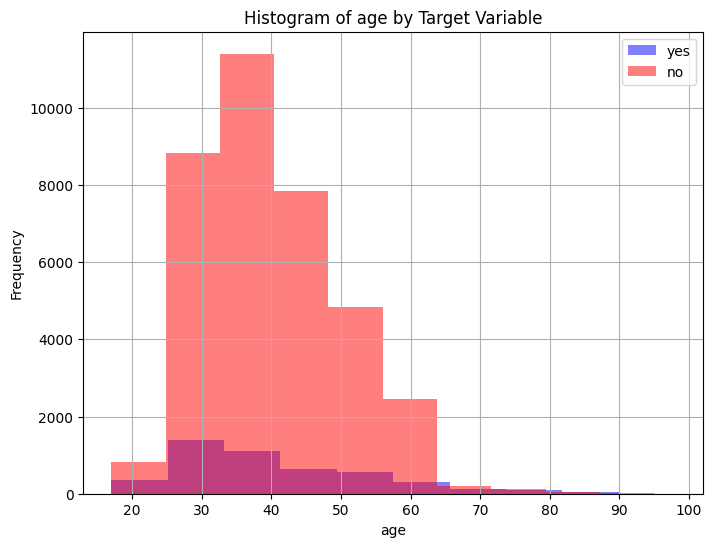

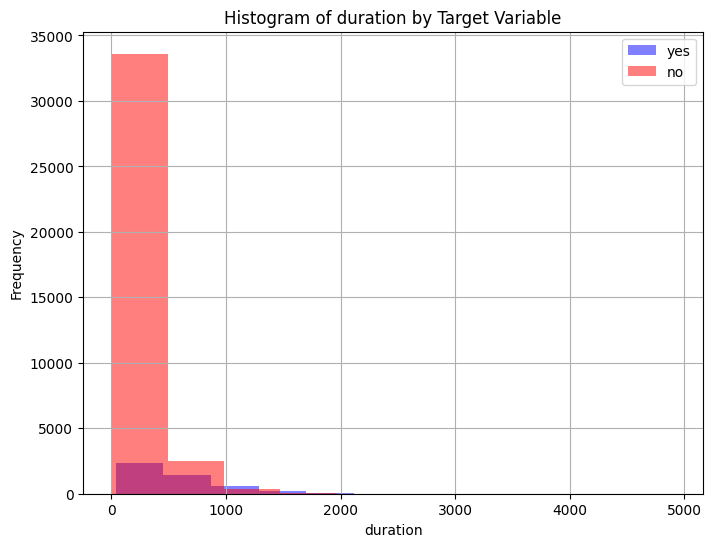

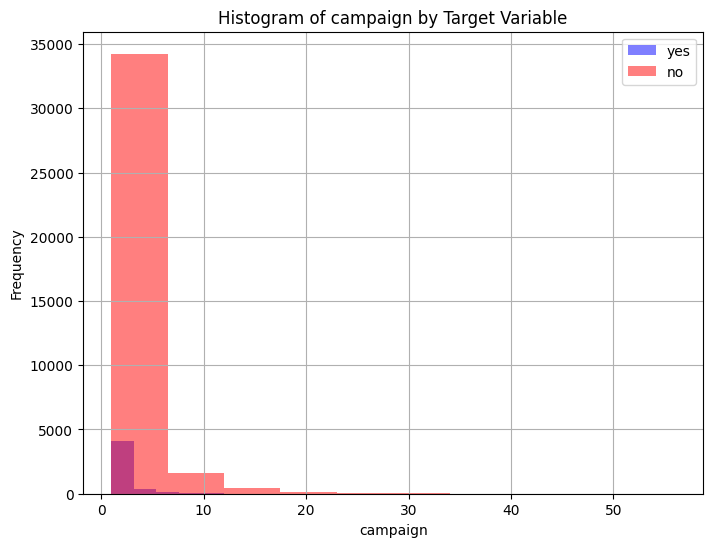

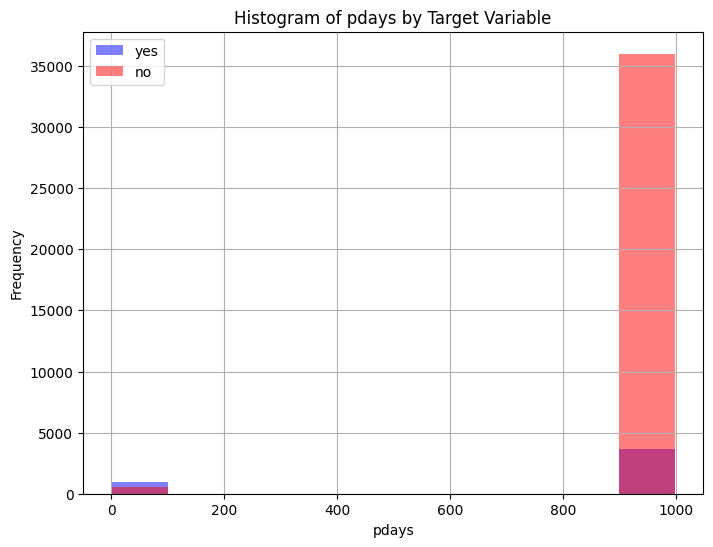

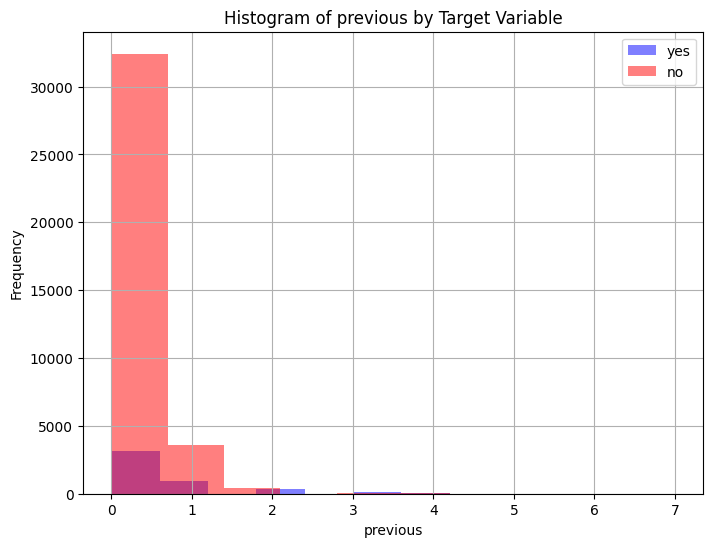

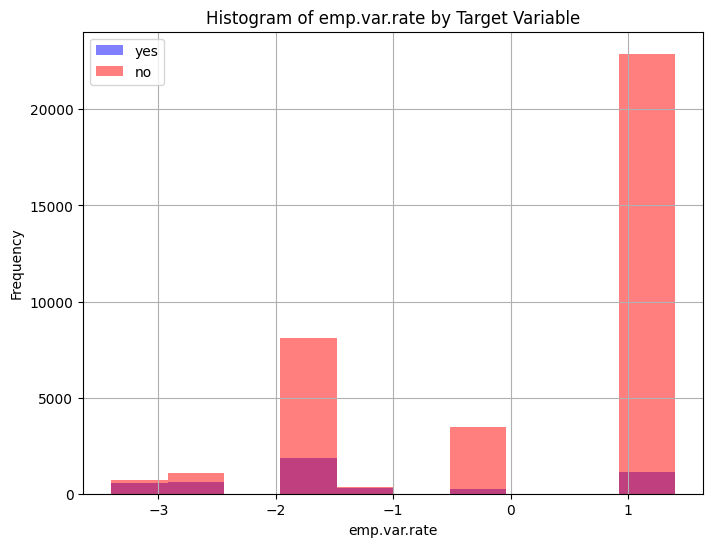

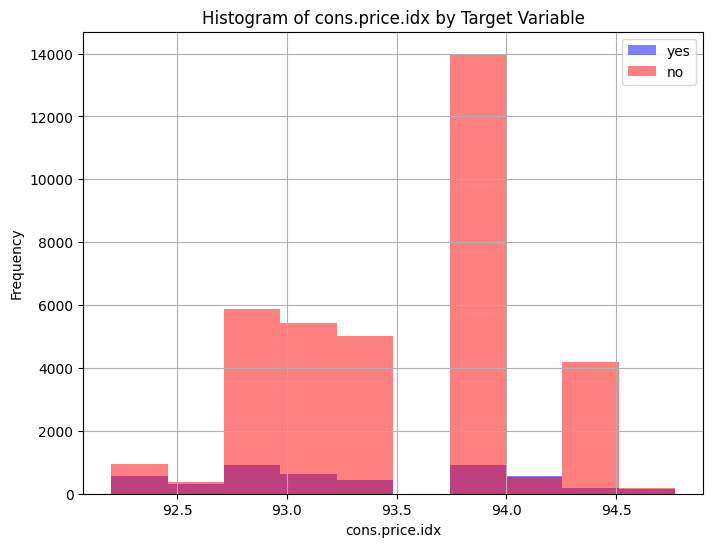

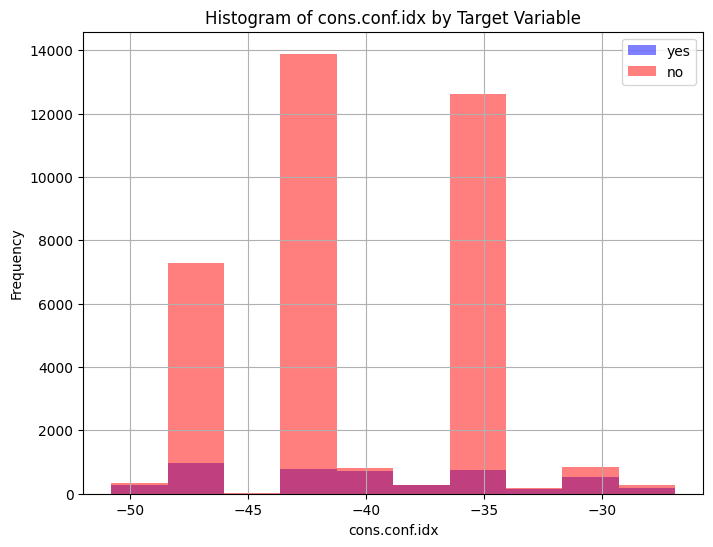

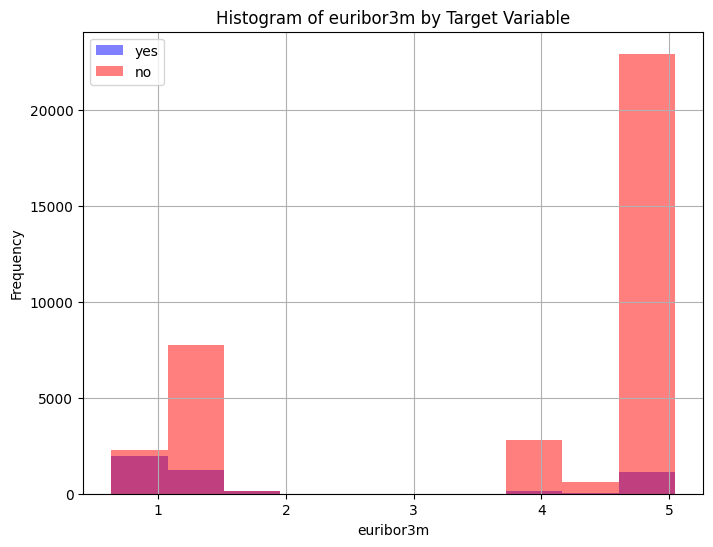

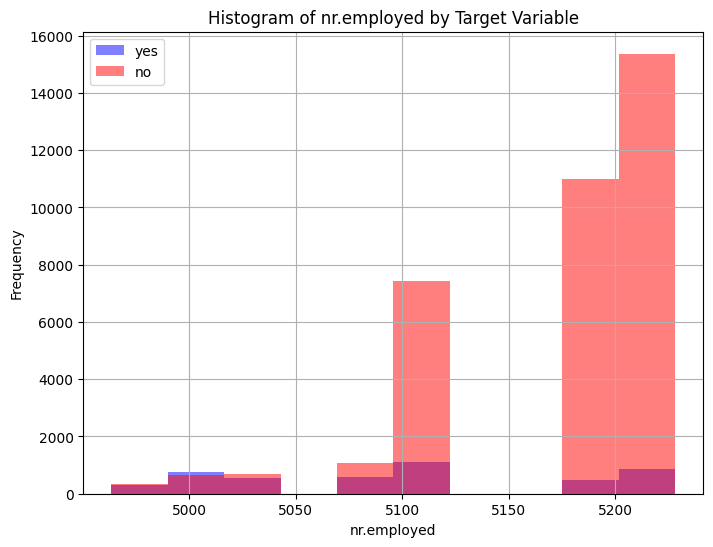

In [35]:
# prompt: plot histograms of various features of df3 against y

import matplotlib.pyplot as plt

# Assuming df3 is already loaded and preprocessed as in your provided code.

# Select numerical features for histograms
numerical_features = df3.select_dtypes(include=['number']).columns

# Iterate through numerical features and plot histograms
for col in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df3[df3['y'] == 'yes'][col], alpha=0.5, label='yes', color='blue')
    plt.hist(df3[df3['y'] == 'no'][col], alpha=0.5, label='no', color='red')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} by Target Variable')
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
# prompt: create a support vector classifier model for df3

# Initialize the Support Vector Classifier with a different kernel (e.g., 'rbf')
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # You can tune C and gamma

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7303
         yes       0.67      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

[[7122  181]
 [ 574  361]]


In [37]:
X = df3.drop('y', axis=1)
y = df3.y

le = LabelEncoder()
y = le.fit_transform(y)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

models = {
    'KNN': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'SVC': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'Ridge Classifier': (RidgeClassifier(), {'ridgeclassifier__alpha': [0.1, 1, 10]}),
    'Lasso': (Lasso(max_iter=1000), {'lasso__alpha': [0.1, 1, 10]})
}


In [40]:
'''
# Define features (X) and target (y)
X = churn.drop('Churn', axis=1)
y = churn['Churn']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
'''

"\n# Define features (X) and target (y)\nX = churn.drop('Churn', axis=1)\ny = churn['Churn']\n\n# Encode the target variable\nle = LabelEncoder()\ny = le.fit_transform(y)\n\n# Identify categorical and numerical columns\ncategorical_columns = X.select_dtypes(include=['object']).columns.tolist()\nnumerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()\n"

In [46]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time'])
results_df.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/model_results.json')

In [48]:
# prompt: display results of model_results.json in a table format

import pandas as pd

# Load the JSON data into a pandas DataFrame.
results_df = pd.read_json('data/model_results.json')

# Display the DataFrame as a table.
results_df

,train score,test score,average fit time
knn,0.924219,0.904467,9.380254
logisticregression,0.911836,0.911143,2.607633
svc,0.921700,0.911143,140.095695
decisiontreeclassifier,0.917420,0.915028,1.169070


from matplotlib import pyplot as plt
results_df['train score'].plot(kind='hist', bins=20, title='train score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['test score'].plot(kind='hist', bins=20, title='test score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['average fit time'].plot(kind='hist', bins=20, title='average fit time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='train score', y='test score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='test score', y='average fit time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['test score']
  ys = series['train score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('test score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('test score')
_ = plt.ylabel('train score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['test score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'test score'}, axis=1)
              .sort_values('test score', ascending=True))
  xs = counted['test score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('test score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('test score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['average fit time']
  ys = series['train score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('average fit time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('average fit time')
_ = plt.ylabel('train score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['average fit time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'average fit time'}, axis=1)
              .sort_values('average fit time', ascending=True))
  xs = counted['average fit time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('average fit time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('average fit time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['train score'].plot(kind='line', figsize=(8, 4), title='train score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['test score'].plot(kind='line', figsize=(8, 4), title='test score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['average fit time'].plot(kind='line', figsize=(8, 4), title='average fit time')
plt.gca().spines[['top', 'right']].set_visible(False)

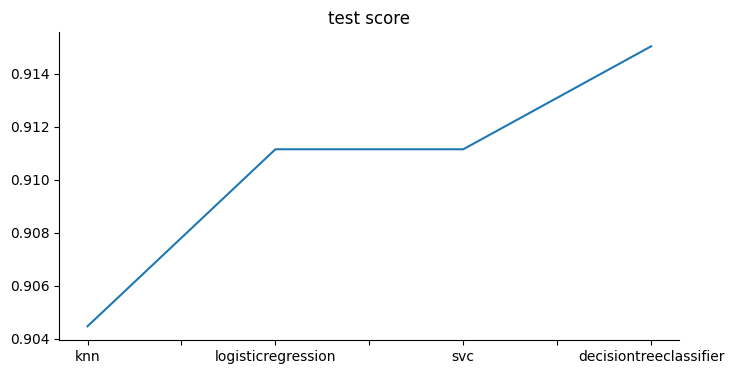

In [49]:
# @title test score

from matplotlib import pyplot as plt
results_df['test score'].plot(kind='line', figsize=(8, 4), title='test score')
plt.gca().spines[['top', 'right']].set_visible(False)

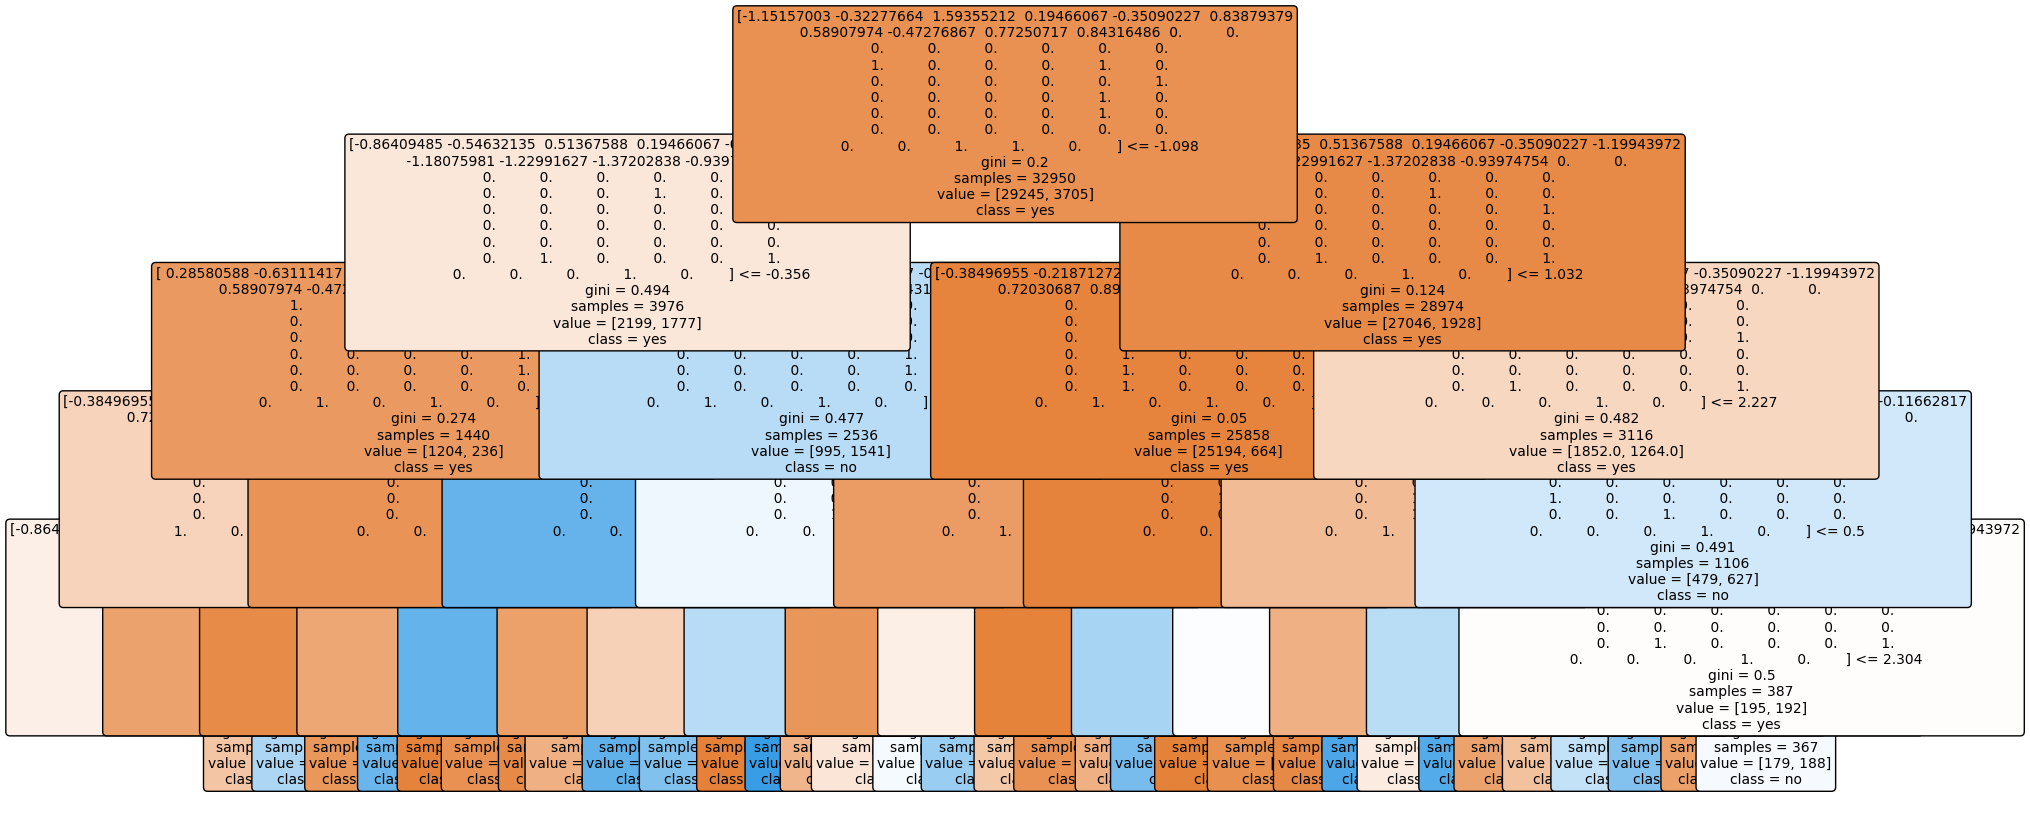

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'best_model' is the trained DecisionTreeClassifier from the previous code
# Replace 'decisiontreeclassifier' with the actual name if different
best_decision_tree_model = grid_search.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model.named_steps['decisiontreeclassifier'],
          feature_names=list(preprocessor.fit_transform(X_train)),
          class_names=['yes', 'no'], # Assuming your target is binary 0/1
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

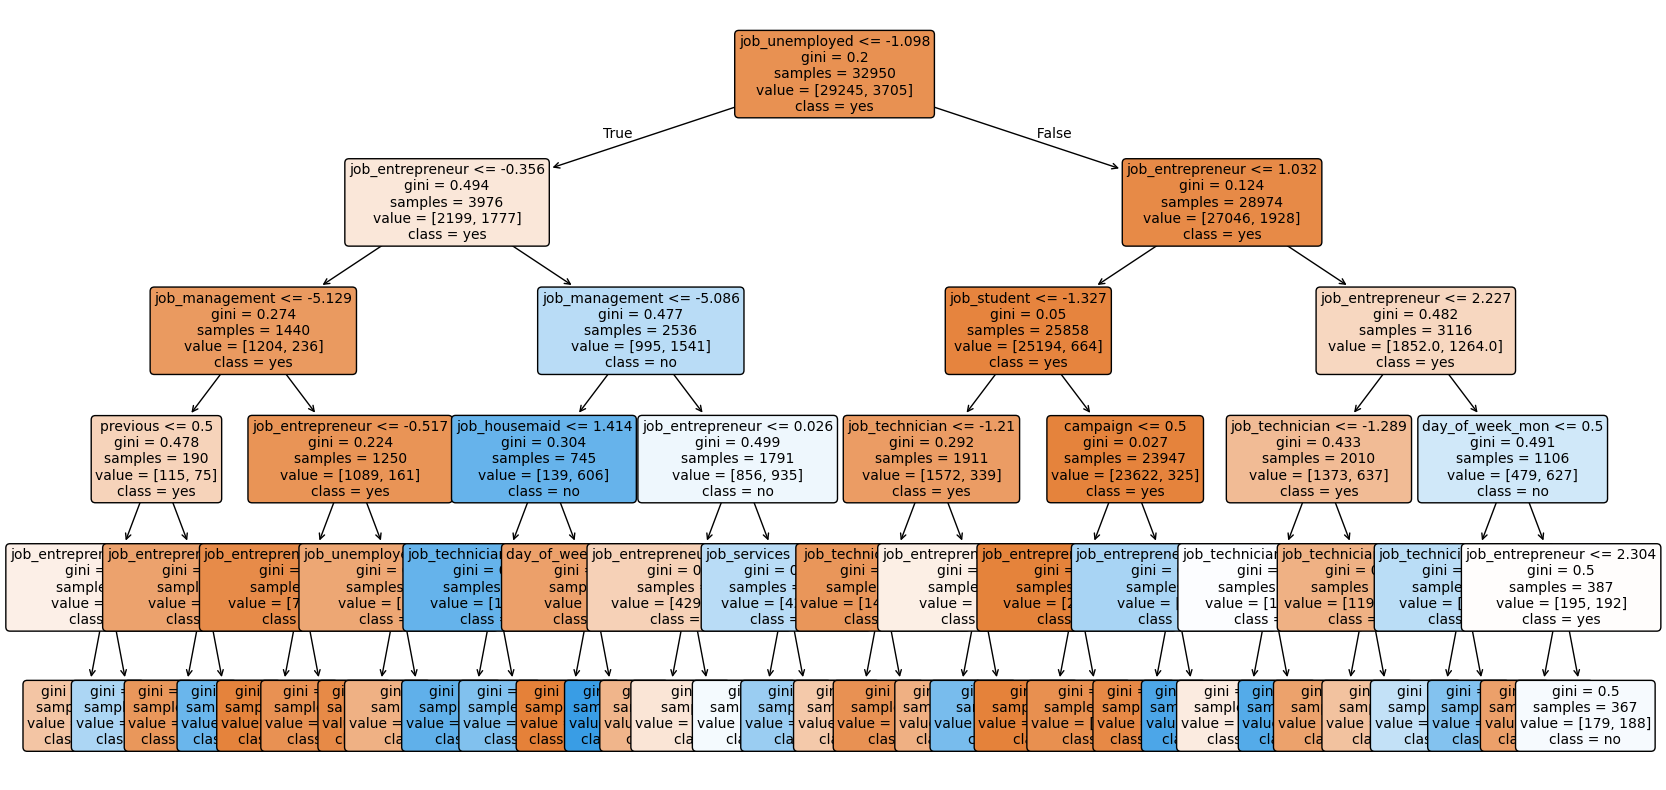

In [43]:

# Get feature names after transformation
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)) + numerical_columns


plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model.named_steps['decisiontreeclassifier'],
          feature_names=feature_names,  # Use the extracted feature names
          class_names=['yes', 'no'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()